# Team Members
- 22127148 - Dương Nhật Huy
- 22127224 - Trương Thuận Kiệt
- 22127257 - Phạm Minh Mẫn

# Table of contents
1. [Libraries](#libraries)
2. [Data Collection](#collect)
3. [Overview of dataset](#overview-of-dataset)
4. [Preprocessing data](#preprocessing)
5. [Questions](#questions)
    - [Question 1](#question-1)
    - [Question 2](#question-2)
    - [Question 3](#question-3)
6. [Conclusion](#conclusion)
    - [Difficulties during the project](#difficulties)
    - [Useful things learned](#useful)
    - [Plans to improve if have more time](#plans)
7. [References](#references)


<div id = "libraries">
<h2>1. Libraries</h2>
<p>Import necessary libraries to use</p> 
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

<div id="collect"> <h2>2. Data Collection</h2> </div>


- **Subject of data:**
The data pertains to stroke prediction in patients, containing information about various health parameters such as age, gender, hypertension, heart disease, smoking status, and more. Its primary purpose is to help predict the likelihood of stroke in individuals based on these features

- **Source of data:**
    - The source of the data is **`Kaggle`**:
[Data Stroke Prediction](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)
    - This dataset is uploaded by **Fede Soriano**, who is listed as the contributor on **`Kaggle`**.

- **Permission and Licensing:**
    - (Confidential Source) - Use only for educational purposes If you use this dataset in your research, please credit the author.

- **Data Collection:**

    - The dataset documentation does not provide explicit details about data collection methods on the **`Kaggle`** page, but generally, healthcare datasets like this are either:

        - Collected from healthcare systems or clinical records.
        - Synthetic data generated based on statistical distributions to mimic real-world health conditions.

<div id="overview-of-dataset"> <h2>3. Overview of dataset</h2> </div>
Provide an overview of the dataset.

In [3]:
data = pd.read_csv('./Data/healthcare-dataset-stroke-data.csv')

In [4]:
data.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h3> Number of rows and cols </h3>

In [5]:
print("Number of rows: ", len(data))

Number of rows:  5110


In [6]:
print("Number of columns: ", len(data.columns))

Number of columns:  12


<h3> Meaning of each row </h3>

Each row will represent each patient's medical record of stroke with some features relating to that patient.

After looking into the entire data of file csv, it can be seen there are no abnormal rows.

<h3> Duplicated rows </h3>

In [7]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


So can be seen that there is no duplicates

<h3> Meaning of each column </h3>

In [8]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Here is the description of each column:
    - **id**: id of each patient
    - **gender**: each patient's gender can be male, female and other
    - **age**: how old is each patient
    - **hypertension**: when the pressure in blood is too high
    - **heart_disease**:  when the patient have disease relates to heart
    - **ever_married**: whether the patient is or used to be married
    - **work_type**: the job status of the patient
    - **Residence_type**: the area that patients live
    - **avg_glucose_level**: the level of sugar in the blood
    - **bmi**: measure of body fat based on height and weight
    - **smoking_status**: whether the patient is smoking or not
    - **stroke**: whether the patient got stroke or not

- Unique values and value range of each column

In [9]:
# Unique values in each column
print("Unique values of gender: ", data['gender'].unique())
print("Unique values of hypertension: ", data['hypertension'].unique())
print("Unique values of heart_disease: ", data['heart_disease'].unique())
print("Unique values of ever_married: ", data['ever_married'].unique())
print("Unique values of work_type: ", data['work_type'].unique())
print("Unique values of Residence_type: ", data['Residence_type'].unique())
print("Unique values of smoking_status: ", data['smoking_status'].unique())
print("Unique values of stroke: ", data['stroke'].unique())

Unique values of gender:  ['Male' 'Female' 'Other']
Unique values of hypertension:  [0 1]
Unique values of heart_disease:  [1 0]
Unique values of ever_married:  ['Yes' 'No']
Unique values of work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values of Residence_type:  ['Urban' 'Rural']
Unique values of smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Unique values of stroke:  [1 0]


- So we can see unique values of each column:
    - **gender**: Male, Female, Other
    - **heart_disease**: 0: No, 1: Yes
    - **ever_married**: Yes, No
    - **work_type**: Private, Self-employed, Govt_job, children, Never_worked
    - **Residence_type**: Urban, Rural
    - **smoking_status**: formerly smoked, never smoked, smokes, Unknown
    - **stroke**: 1: Yes, 0: No

In [10]:
# Range values of age, avg_glucose_level, bmi
print("Range of age: ", data['age'].min(), " - ", data['age'].max())
print("Range of avg_glucose_level: ", data['avg_glucose_level'].min(), " - ", data['avg_glucose_level'].max())
print("Range of bmi: ", data['bmi'].min(), " - ", data['bmi'].max())

Range of age:  0.08  -  82.0
Range of avg_glucose_level:  55.12  -  271.74
Range of bmi:  10.3  -  97.6


- Range values:
    - **age**: 0.08-82.0
    - **avg_glucose_level**: 55.12 - 271.74
    - **bmi**: 10.3 - 97.6

=> As we see, age value got float values and needs to be corrected to integer in Data Processing

<h3>Current data type of each column</h3>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Look like all data type of each column is correct, except from age type is currently float

<h3>Checking null values</h3>

In [12]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- Luckily as can be seen, only bmi column has null values

### NUMERICAL COLUMNS EXPLORATION

###   Missing data

- As can be from the above information, only bmi has the null values, so let have a look at it

In [13]:
#List out elements in bmi column
numerical = ['bmi']
data[numerical]

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
...,...
5105,NaN
5106,40.0
5107,30.6
5108,25.6


- In order to identify kind of missingness, we will use **t-test**, for these reasons:
    - The variable is numerical: It is suitable for continuous or ordinal data where you’re comparing averages.
    - Two independent groups: Rows with and without missing bmi values are distinct groups.
    - Small sample sizes: The t-test is particularly useful for small-to-moderate-sized datasets, assuming data normality or robustness

In [14]:

null = data[data['bmi'].isnull()]
non_null = data[data['bmi'].notnull()]

from scipy.stats import ttest_ind

for col in data.columns:
    if (data[col].dtype == 'float64' or data[col].dtype == 'int64') and (col != 'bmi' and col != 'id'):
        t_stat, p_value = ttest_ind(null[col].dropna(), non_null[col].dropna(), equal_var=False)
        print("\nT-test results for", col, "between groups:")
        print("t-statistic:", t_stat)
        print("p-value:", p_value)


for col in data.columns:
    if data[col].dtype == 'object' and col != 'bmi':
        print("\nMissing 'bmi' by", col, ":")
        print(data.groupby(col)['bmi'].apply(lambda x: x.isnull().sum()))



T-test results for age between groups:
t-statistic: 5.725978410349808
p-value: 3.397736416677071e-08

T-test results for hypertension between groups:
t-statistic: 4.698744140096242
p-value: 4.759849351086857e-06

T-test results for heart_disease between groups:
t-statistic: 4.347777190024152
p-value: 2.1625306918478056e-05

T-test results for avg_glucose_level between groups:
t-statistic: 5.068112430827461
p-value: 8.816698412059382e-07

T-test results for stroke between groups:
t-statistic: 5.512357794686704
p-value: 1.0614185880641118e-07

Missing 'bmi' by gender :
gender
Female     97
Male      104
Other       0
Name: bmi, dtype: int64

Missing 'bmi' by ever_married :
ever_married
No      52
Yes    149
Name: bmi, dtype: int64

Missing 'bmi' by work_type :
work_type
Govt_job          27
Never_worked       0
Private          114
Self-employed     44
children          16
Name: bmi, dtype: int64

Missing 'bmi' by Residence_type :
Residence_type
Rural     95
Urban    106
Name: bmi, dtyp

- In terms of numerical columns, since there are statistically significant differences in these features, this strongly suggests that the missingness of bmi is **Missing at Random (MAR)** rather than Missing Completely at Random (MCAR). This means that missing bmi values are likely associated with other variables, such as age, hypertension, heart disease, glucose levels, and stroke occurrence
- In terms of categorical columns, the missingness of bmi appears to follow a **MAR (Missing at Random)** pattern for certain categorical variables

#### Percentage of missing value

In [15]:
#What is the percentage of missing value
for col in numerical:
    missing_rate = (data[col].isna().sum() / len(data[col]))*100
    print( f'{col}: {missing_rate}%')

bmi: 3.9334637964774952%


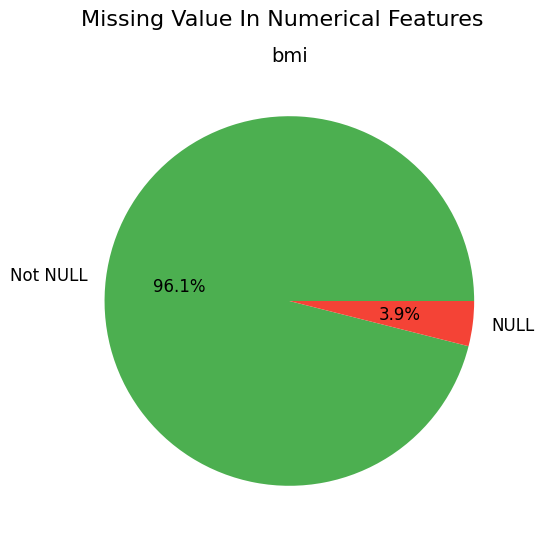

In [16]:
fig, ax = plt.subplots(1, len(numerical), figsize=(15, 5)) if len(numerical) > 1 else (plt.subplots(1, 1, figsize=(6, 6)))
ax = [ax] if len(numerical) == 1 else ax 

for i in range(len(numerical)):
    ax_i = ax[i]
    missing_count = data[numerical[i]].isnull().value_counts().reindex([False, True], fill_value=0)
    
    wedges, texts, autotexts = ax_i.pie(
        missing_count, 
        labels=['Not NULL', 'NULL'], 
        autopct='%1.1f%%', 
        colors=['#4CAF50', '#F44336']
    )

    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_fontsize(12)

    ax_i.set_title(numerical[i], fontsize=14)

plt.suptitle("Missing Value In Numerical Features", fontsize=16)
plt.subplots_adjust(wspace=0.5)
plt.show()

- Fortunately, the percentage of null values in the bmi column is not very high, which means that handling these missing values should not drastically impact the dataset's integrity or size

<h4> Helper Function </h4>

Help to visualize the numerical columns

In [17]:
def histogram_plot(data = [], title = '', xlabel = '', ylabel = '', color = '', mean_line = False, median_line = False, bins = 30):
    plt.figure(figsize=(8,8))
    sns.histplot(data, bins=bins, color=color)
    plt.xticks(bins)

    if mean_line:
        mean_val = data.mean()
        plt.axvline(mean_val, color='blue', linestyle='-', linewidth=1.5, label=f"Mean: {mean_val:.1f}")
    if median_line:
        median_val = data.median()
        plt.axvline(median_val, color='red', linestyle='-', linewidth=1.5, label=f"Median: {median_val:.1f}")

    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight = 'bold')
    plt.legend()
    plt.show()

def density_plot(data: pd.DataFrame, col1: str = '', col2: str = '', label1: str = '', label2: str = '', title: str = '', xlabel: str = '', ylabel: str = '', bins: int = 30):
    
    plt.figure(figsize=(8, 8))
    
    plt.hist(data[data[col2] == 1][col1], color='red', bins=bins, label=label1, alpha=0.7, density=True)
    
    plt.hist(data[data[col2] == 0][col1], color='blue', bins=bins, label=label2, alpha=0.7, density=True)
    
    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.legend()
    plt.show()

<h4> Age Column </h4>

+ Descriptive Statistic

In [18]:
age_mean = data['age'].mean()
age_median = data['age'].median()
age_min = data['age'].min()
age_max = data['age'].max()
age_std = data['age'].std()

print(f"Mean age: {age_mean}")
print(f"Median age: {age_median}")
print(f"Min age: {age_min}")
print(f"Max age: {age_max}")
print(f"Standard deviation of age: {age_std}")

Mean age: 43.226614481409
Median age: 45.0
Min age: 0.08
Max age: 82.0
Standard deviation of age: 22.61264672311349


* Percentage of missing values

In [19]:
print("Percentage of missing values in age: ", (data['bmi'].isnull().sum() / len(data['bmi']))*100)

Percentage of missing values in age:  3.9334637964774952


+ The ages are totally fine, no negative or missing value
+ No age that's exceed human level<br>
&rarr; Not abnormal

+ Age distribution

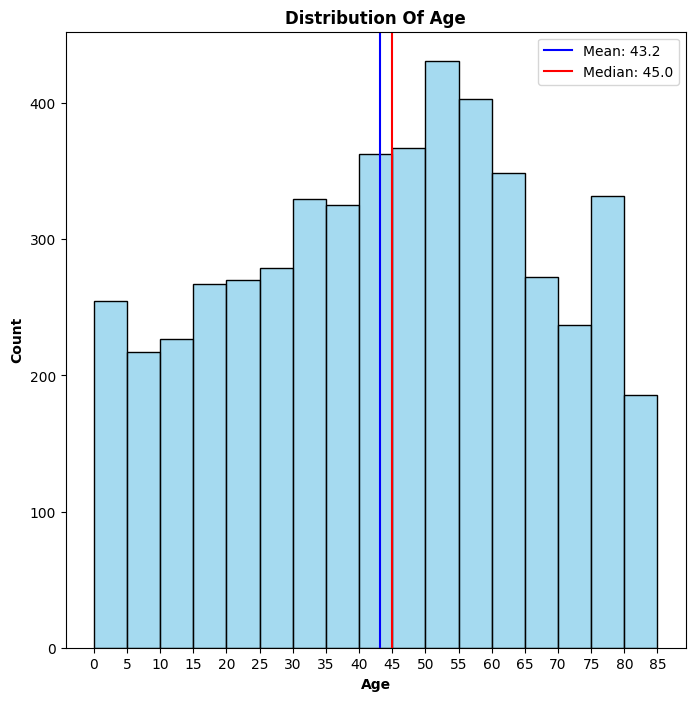

In [20]:
histogram_plot(data['age'], title='Distribution Of Age', xlabel='Age', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(age_min), int(age_max + 5),5))

&rarr; The distribution of ages are relatively even

+ Probability Density

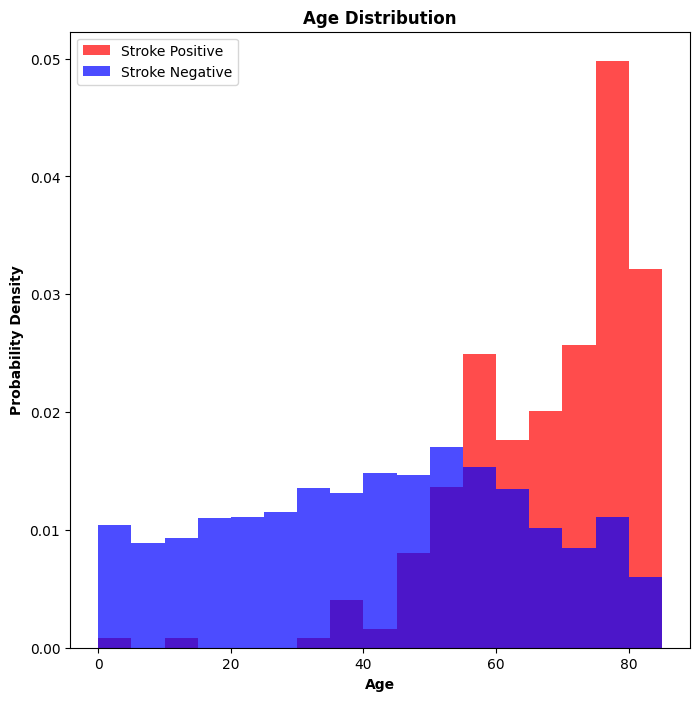

In [21]:
density_plot(data, col1='age', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title = 'Age Distribution', xlabel='Age', ylabel='Probability Density', bins=range(int(age_min), int(age_max + 5),5))

&rarr; We clearly see that the older people get, the more likely conveyed people get stroke. <br>
&rarr; **This piece of information is important for predicting stroke**

<h4>Average Glucose Level Column</h4>

+ Did you know : Chemical formula for Glucose is C6H12O6

In [22]:
glu_mean = data['avg_glucose_level'].mean()
glu_median = data['avg_glucose_level'].median()
glu_min = data['avg_glucose_level'].min()
glu_max = data['avg_glucose_level'].max()
glu_std = data['avg_glucose_level'].std()

print(f"Mean glucose level: {glu_mean}")
print(f"Median glucose level: {glu_median}")
print(f"Min glucose level: {glu_min}")
print(f"Max glucose level: {glu_max}")
print(f"Standard deviation of glucose level: {glu_std}")

Mean glucose level: 106.1476771037182
Median glucose level: 91.88499999999999
Min glucose level: 55.12
Max glucose level: 271.74
Standard deviation of glucose level: 45.28356015058198


* The percentage of missing values

In [23]:
print("Percentage of missing values in glucose level: ", (data['avg_glucose_level'].isnull().sum() / len(data['avg_glucose_level']))*100)

Percentage of missing values in glucose level:  0.0


+ No negative or missing value detected<br>
&rarr; Not Abnormal

+ Glucose level distribution

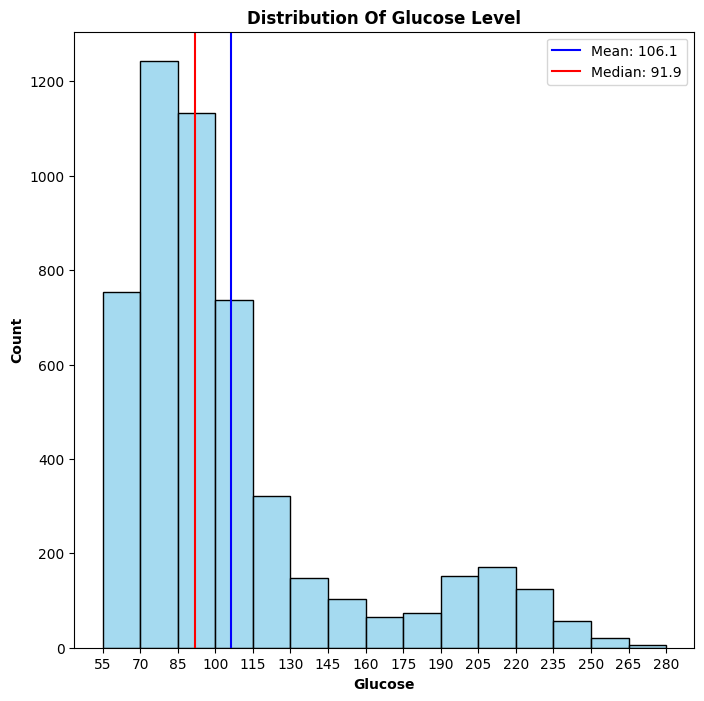

In [24]:
histogram_plot(data['avg_glucose_level'], title='Distribution Of Glucose Level', xlabel='Glucose', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(glu_min), int(glu_max + 15),15))

&rarr; The distribution of glucose level is skewed in positive direction, with most value come from the range of 55 to 115 </br>
&rarr; **The majority of individuals have relatively lower glucose levels. However, there is a significant number of individuals with higher glucose levels, contributing to the positive skew. This distribution could be indicative of a population with a mix of healthy individuals and those with potential glucose regulation issues**

+ Probability Density

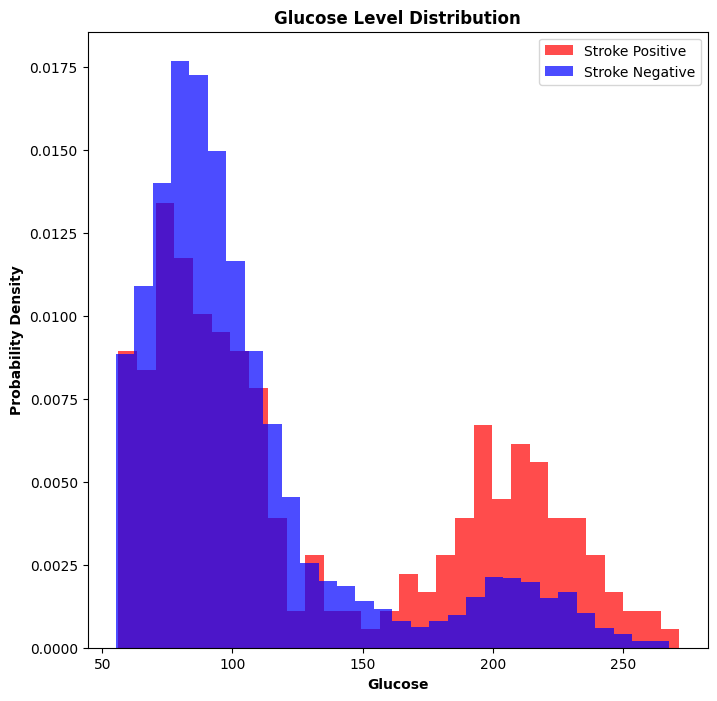

In [25]:
density_plot(data, col1='avg_glucose_level', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title = 'Glucose Level Distribution', xlabel='Glucose', ylabel='Probability Density', bins=30)

&rarr; Something happens when we follow the Glucose level as it raise from 150 to 250. We notice that stroke possibility is significantly more than no stroke </br>
&rarr; Both groups exhibit a positively skewed distribution. This means that there are more individuals with lower glucose levels compared to higher ones </br>
&rarr; **The histogram suggests that individuals with a history of stroke have a higher proportion of individuals with higher glucose levels**

<h4> BMI Column </h4>

+ Descriptive Statistic

In [26]:
bmi_mean = data['bmi'].mean()
bmi_median = data['bmi'].median()
bmi_min = data['bmi'].min()
bmi_max = data['bmi'].max()
bmi_std = data['bmi'].std()

# Print the results
print(f"Mean BMI: {bmi_mean}")
print(f"Median BMI: {bmi_median}")
print(f"Min BMI: {bmi_min}")
print(f"Max BMI: {bmi_max}")
print(f"Standard deviation of BMI: {bmi_std}")

Mean BMI: 28.893236911794666
Median BMI: 28.1
Min BMI: 10.3
Max BMI: 97.6
Standard deviation of BMI: 7.854066729680164


+ No negative value<br>
&rarr; Not Abnormal

+ Value Distribution

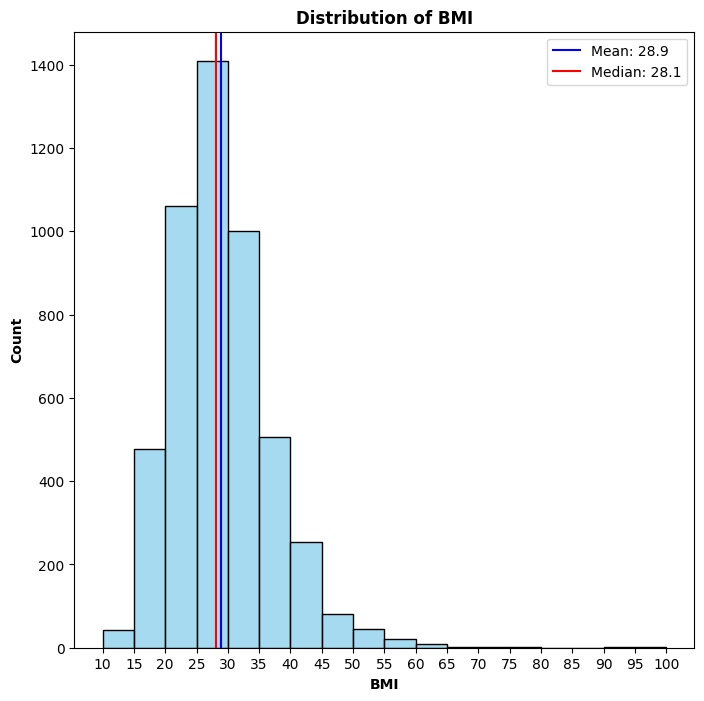

In [27]:
histogram_plot(data['bmi'], title='Distribution of BMI', xlabel='BMI', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(bmi_min), int(bmi_max + 5), 5))


&rarr; The BMI distribution is **positively skewed** in positive direction with most values come from the range of 15 to 45. However, there are some outliers at the range of 90-100, those may cause noise <br>
&rarr; **The histogram suggests that the majority of individuals in this dataset have a BMI in the overweight range. However, there is a significant number of individuals with higher BMI values, contributing to the positive skew. This distribution could be indicative of a population with a high prevalence of overweight and obesity**

+ Probability Density

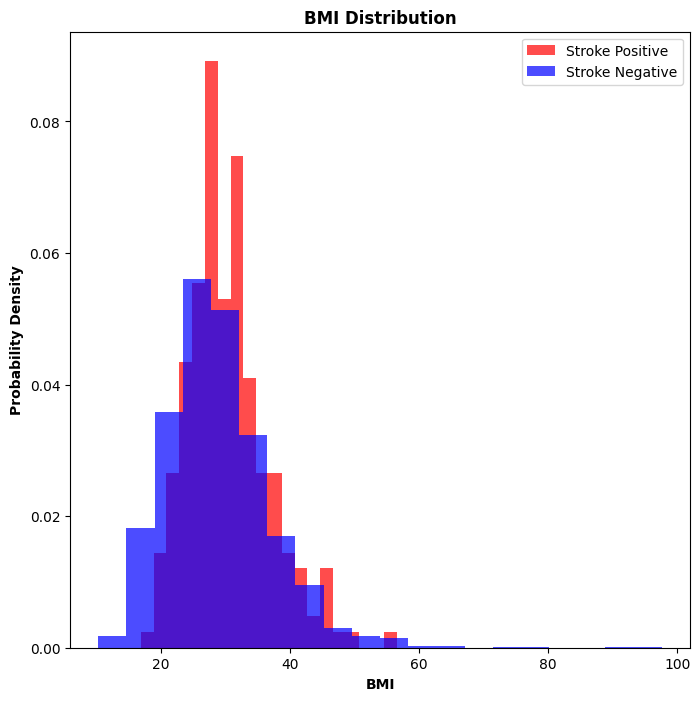

In [28]:
density_plot(data, col1='bmi', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title='BMI Distribution', xlabel='BMI', ylabel='Probability Density', bins=20)


&rarr; Both Stoke Positive and Negative have the BMI value distributed evenly, the probability get very high at the range 20-40, especially for Stroke Positive<br>
&rarr; Both groups exhibit a positively skewed distribution<br>
&rarr; **The observed difference in BMI distribution between the two groups raises the possibility of an association between higher BMI and the risk of stroke**

<h3>Categorical columns exploration</h3>

<h4>Gender Column</h4>

- Distribution of values

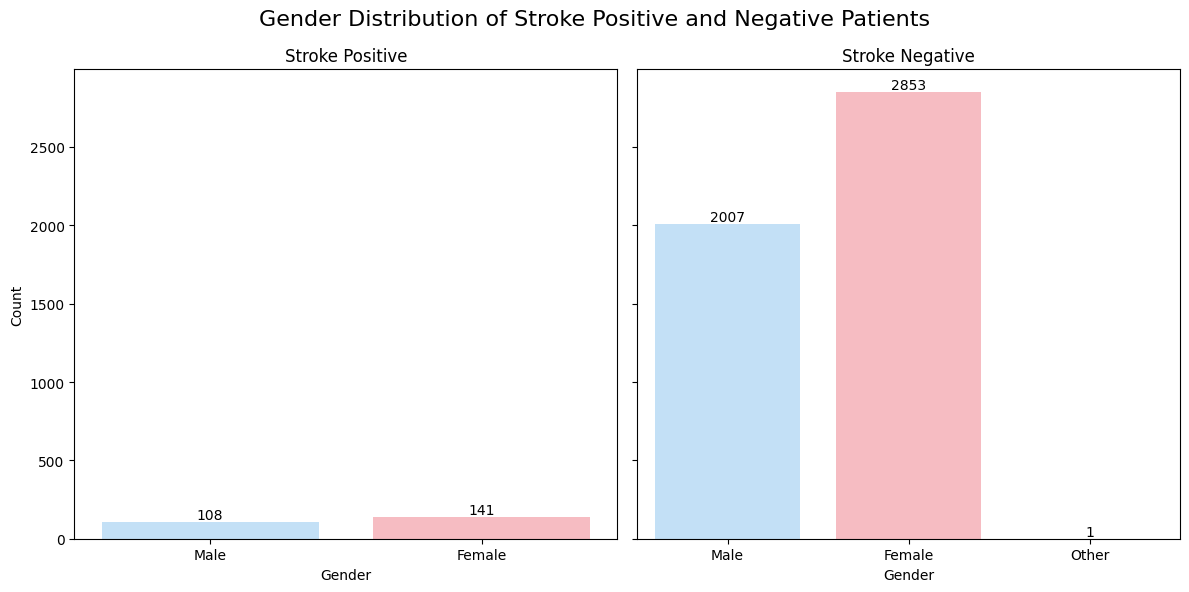

In [29]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

pastel_colors = ['#bae1ff', '#ffb3ba', '#baffc9']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.countplot(x='gender', hue='gender', data=stroke_positive, palette=pastel_colors[:2], ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='gender', hue='gender', data=stroke_negative, palette=pastel_colors, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Gender Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()
plt.show()

- Percentage of missing values

In [30]:
print("Percentage of missing values in gender: ", (data['gender'].isnull().sum() / len(data)) * 100)

Percentage of missing values in gender:  0.0


- Different values

In [31]:
print("Number of different gender: ", len(data['gender'].unique()))
print("Different genders: ", data['gender'].unique())

Number of different gender:  3
Different genders:  ['Male' 'Female' 'Other']


- <b>Abnormal</b>: 'Other' gender has only one record, which can be the outliner element. We can remove it from the dataset without causing any problem.

&rarr; <b>Gender seems not to be a risk factor</b>: The visual data reveals that the male-to-female ratio in the stroke-positive plot closely mirrors that of the stroke-negative plot.

<h4>Hypertension Column</h4>

- Distribution of values

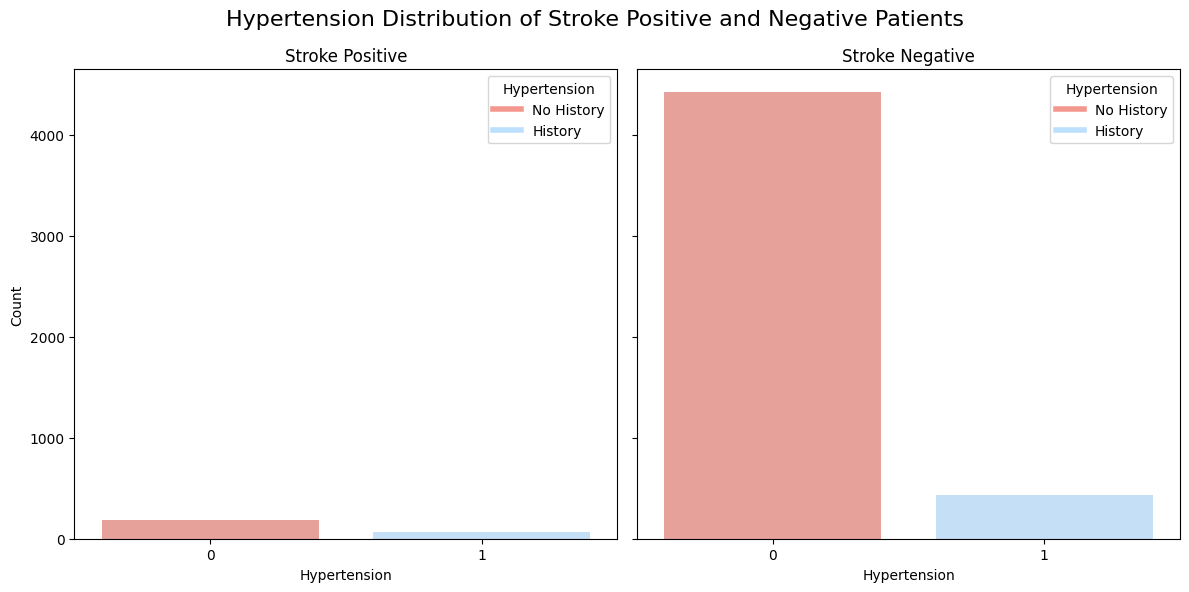

In [32]:
# Hypertension
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting Hypertension Distribution for Stroke Positive patients
sns.countplot(x='hypertension', hue='hypertension', palette=['#f4978e', '#bde0fe'], data=stroke_positive, ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')

# Create a custom legend for the Stroke Positive plot
handles_positive = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[0].legend(handles_positive, ['No History', 'History'], title='Hypertension')

# Plotting Hypertension Distribution for Stroke Negative patients
sns.countplot(x='hypertension', hue='hypertension', palette=['#f4978e', '#bde0fe'], data=stroke_negative, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel('Hypertension')

# Create a custom legend for the Stroke Negative plot
handles_negative = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[1].legend(handles_negative, ['No History', 'History'], title='Hypertension')

# Set the main title
plt.suptitle("Hypertension Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


- Percentage of missing values

In [33]:
print("Percentage of missing values in hypertension: ", (data['hypertension'].isnull().sum() / len(data)) * 100)

Percentage of missing values in hypertension:  0.0


&rarr; In both stroke-positive and stroke-negative populations, **hypertension is not overwhelmingly present**. Most patients, regardless of stroke status, do not have a history of hypertension. However, it is important to note that patients with a history of hypertension are more common in the stroke-negative group

&rarr; **Hypertension does not appear to be the sole or dominant factor contributing to stroke**

<h4>Heart Disease Column</h4>

- Distribution of values

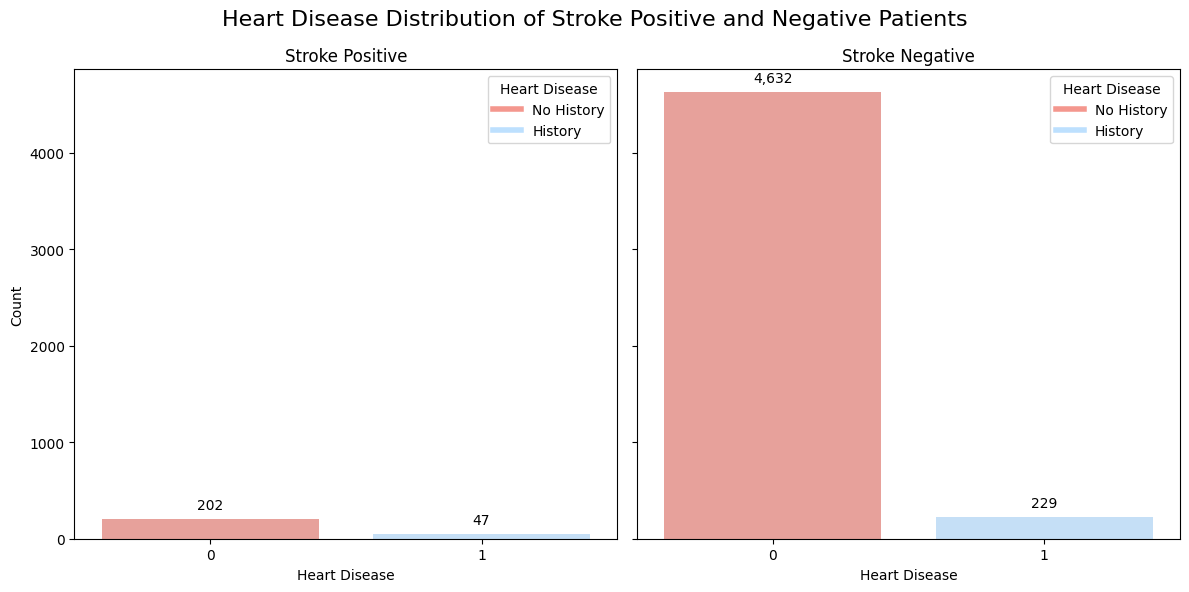

In [34]:
# Hypertension
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting Hypertension Distribution for Stroke Positive patients
sns.countplot(x='heart_disease', hue='heart_disease',palette=['#f4978e', '#bde0fe'], data=stroke_positive, ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel('Heart Disease')
axes[0].set_ylabel('Count')

# Create a custom legend for the Stroke Positive plot
handles_positive = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[0].legend(handles_positive, ['No History', 'History'], title='Heart Disease')

# Plotting Hypertension Distribution for Stroke Negative patients
sns.countplot(x='heart_disease', hue='heart_disease', palette=['#f4978e', '#bde0fe'], data=stroke_negative, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel('Heart Disease')

# Create a custom legend for the Stroke Negative plot
handles_negative = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[1].legend(handles_negative, ['No History', 'History'], title='Heart Disease')

# Put values on top of the bars
for p in axes[0].patches:
    axes[0].annotate(format(int(p.get_height()), ','), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
for p in axes[1].patches:
    axes[1].annotate(format(int(p.get_height()), ','), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Set the main title
plt.suptitle("Heart Disease Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


- Percentage of missing values

In [35]:
print("Percentage of missing values in heart disease: ", (data['heart_disease'].isnull().sum() / len(data)) * 100)

Percentage of missing values in heart disease:  0.0


- Different values

In [36]:
print("Number of different heart_disease: ", len(data['heart_disease'].unique()))
print("Different heart_disease: ", data['heart_disease'].unique())

Number of different heart_disease:  2
Different heart_disease:  [1 0]


&rarr; Both stroke-positive and stroke-negative patients are more likely to have no history of heart disease. However, the proportion of stroke-positive patients with heart disease history is higher than that of stroke-negative patients, indicating **a possible association between heart disease history and stroke risk**

<h4>Ever Married Column</h4>

- Distribution of values

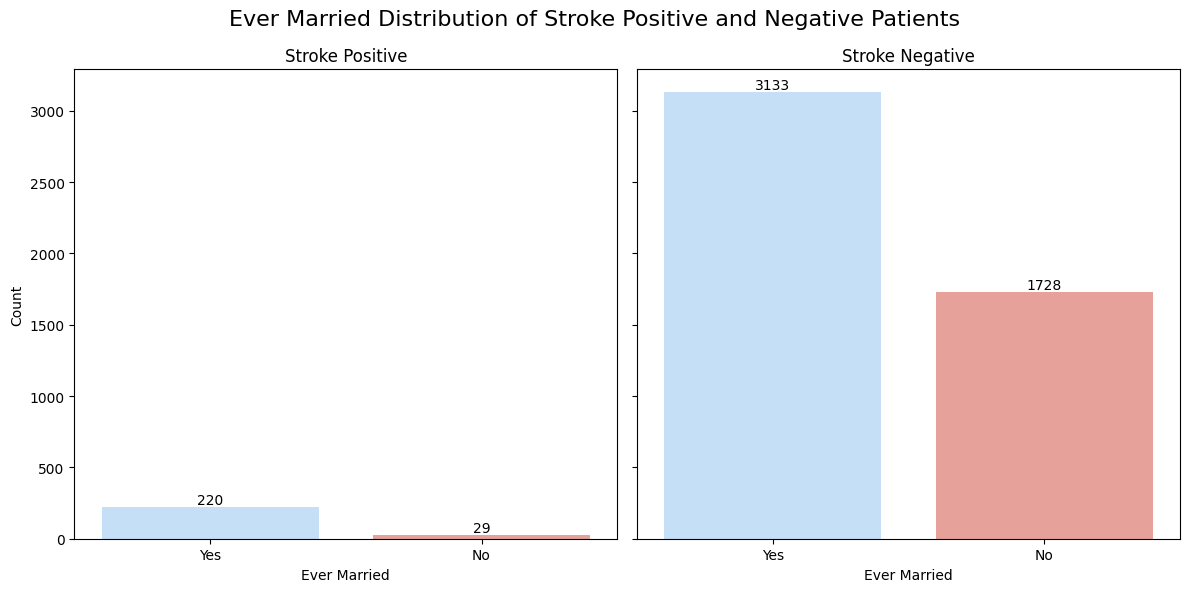

In [37]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.countplot(x='ever_married', hue='ever_married', data=stroke_positive, palette=['#bde0fe', '#f4978e'], ax=axes[0], legend=False, order=['Yes', 'No'])
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Ever Married")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='ever_married', hue='ever_married', data=stroke_negative, palette=['#f4978e', '#bde0fe'], ax=axes[1], legend=False, order=['Yes', 'No'])
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Ever Married") 
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Ever Married Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()
plt.show()

- Percentage of missing values

In [38]:
print("Percentage of missing values in ever_married: ", (data['ever_married'].isnull().sum() / len(data)) * 100)

Percentage of missing values in ever_married:  0.0


- Different values

In [39]:
print("Number of different ever_married: ", len(data['ever_married'].unique()))
print("Different ever_married: ", data['ever_married'].unique())

Number of different ever_married:  2
Different ever_married:  ['Yes' 'No']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>"Ever Married" could be a risk factor</b>: The visual data indicates that the likelihood of stroke is significantly higher among married individuals compared to those who are unmarried.

<h4>Work Type Column</h4>

- Distribution of values

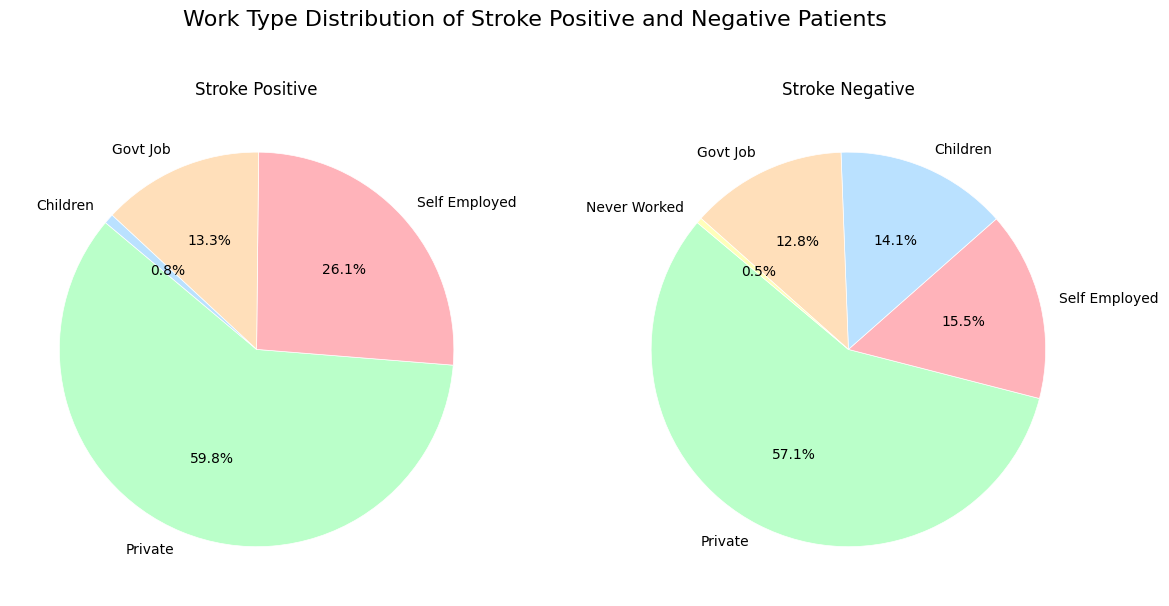

In [40]:
stroke_positive_counts = stroke_positive['work_type'].value_counts(normalize=True) * 100
stroke_negative_counts = stroke_negative['work_type'].value_counts(normalize=True) * 100

pos_labels = ['Private', 'Self Employed', 'Govt Job', 'Children']
neg_labels = ['Private', 'Self Employed', 'Children', 'Govt Job', 'Never Worked']


colors = {
    'Children': '#bae1ff',
    'Govt Job': '#ffdfba',
    'Never Worked': '#ffffba',
    'Private': '#baffc9',
    'Self Employed': '#ffb3ba'
}

pos_colors = [colors[label] for label in pos_labels]
neg_colors = [colors[label] for label in neg_labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(stroke_positive_counts, labels=pos_labels, autopct='%1.1f%%', colors=pos_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[0].set_title("Stroke Positive")

axes[1].pie(stroke_negative_counts, labels=neg_labels, autopct='%1.1f%%', colors=neg_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[1].set_title("Stroke Negative")

plt.suptitle("Work Type Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [41]:
print("Percentage of missing values in work_type: ", (data['work_type'].isnull().sum() / len(data)) * 100)

Percentage of missing values in work_type:  0.0


- Different values

In [42]:
print("Number of different work_type: ", len(data['work_type'].unique()))
print("Different work_type: ", data['work_type'].unique())

Number of different work_type:  5
Different work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Work Type could be a risk factor</b>:
-  <b>Self-employed people have a high rate of having a stroke</b>: The visual data reveals a higher proportion of self-employed individuals in the stroke-positive plot compared to the stroke-negative plot.
-  <b>Children have a very low risk of having a stroke</b>: The visual data shows that children make up a very small proportion in the stroke-positive plot, at less than 1%, whereas in the stroke-negative plot, they account for up to 14.1%.

<h4>Residence Type Column</h4>

- Distribution of values

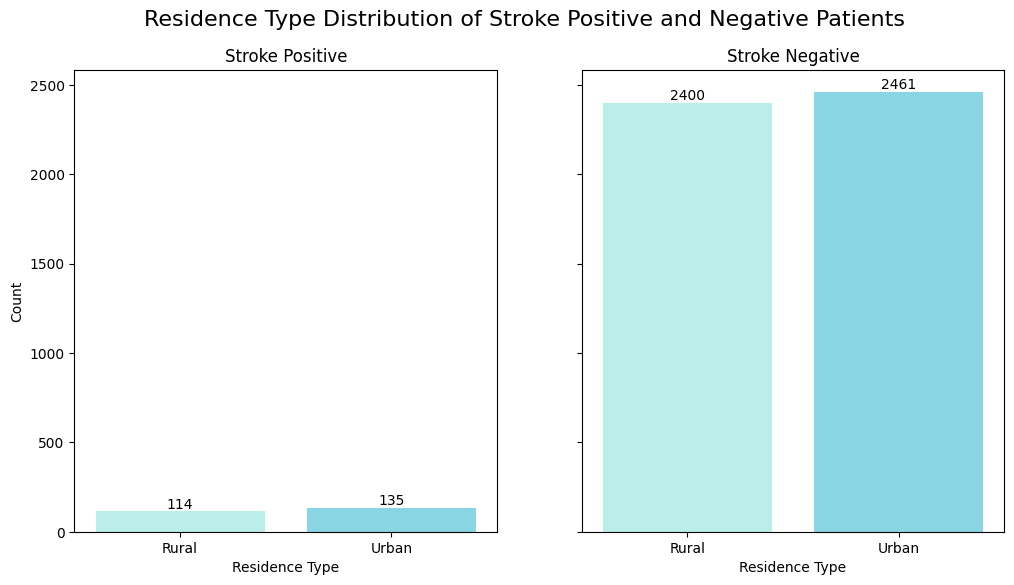

In [43]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.countplot(x='Residence_type', hue='Residence_type', data=stroke_positive, palette=['#7bdff2', '#b2f7ef'], ax=axes[0], legend=False, order=['Rural', 'Urban'])
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Residence Type")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='Residence_type', hue='Residence_type', data=stroke_negative, palette=['#b2f7ef', '#7bdff2'], ax=axes[1], legend=False, order=['Rural', 'Urban'])
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Residence Type") 
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Residence Type Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [44]:
print("Percentage of missing values in Residence_type: ", (data['Residence_type'].isnull().sum() / len(data)) * 100)

Percentage of missing values in Residence_type:  0.0


- Different values

In [45]:
print("Number of different Residence_type: ", len(data['Residence_type'].unique()))
print("Different Residence_type: ", data['Residence_type'].unique())

Number of different Residence_type:  2
Different Residence_type:  ['Urban' 'Rural']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Residence Type seems not to be a risk factor</b>: The rate of stroke among people living in urban areas is strikingly similar to that of those living in rural areas.

<h4>Smoking Status Column</h4>

- Distribution of values

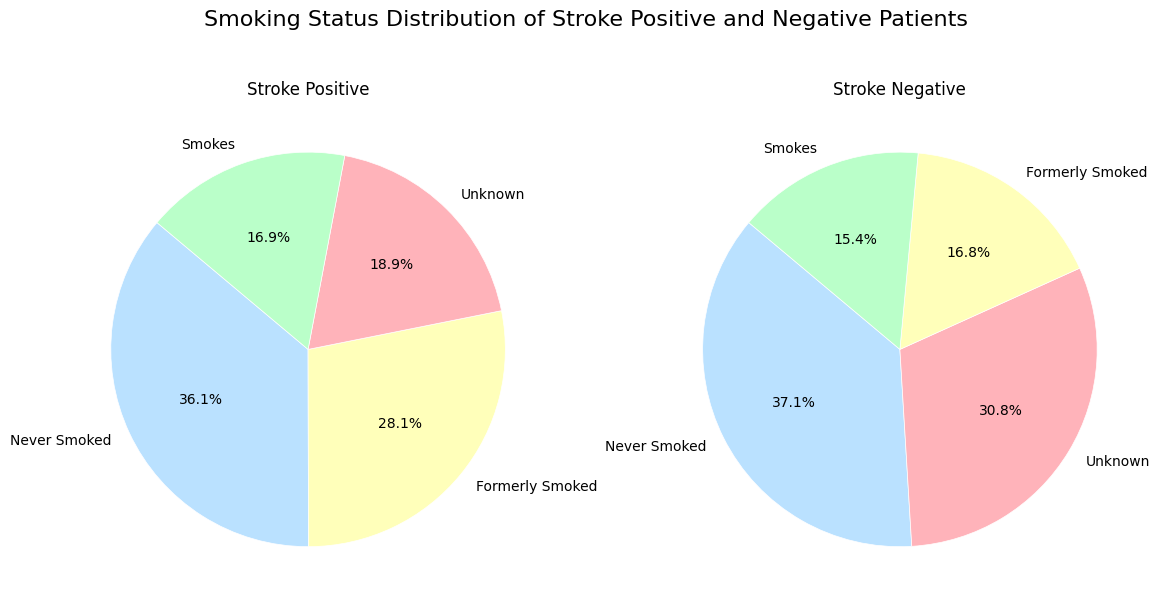

In [46]:
stroke_positive_counts = stroke_positive['smoking_status'].value_counts(normalize=True) * 100
stroke_negative_counts = stroke_negative['smoking_status'].value_counts(normalize=True) * 100

pos_labels = ['Never Smoked', 'Formerly Smoked', 'Unknown', 'Smokes']
neg_labels = ['Never Smoked', 'Unknown', 'Formerly Smoked', 'Smokes']

colors = {
    'Never Smoked': '#bae1ff',
    'Formerly Smoked': '#ffffba',
    'Smokes': '#baffc9',
    'Unknown': '#ffb3ba'
}

pos_colors = [colors[label] for label in pos_labels]
neg_colors = [colors[label] for label in neg_labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(stroke_positive_counts, labels=pos_labels, autopct='%1.1f%%', colors=pos_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[0].set_title("Stroke Positive")

axes[1].pie(stroke_negative_counts, labels=neg_labels, autopct='%1.1f%%', colors=neg_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[1].set_title("Stroke Negative")

plt.suptitle("Smoking Status Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [47]:
print("Percentage of missing values in smoking_status: ", (data['smoking_status'].isnull().sum() / len(data)) * 100)

Percentage of missing values in smoking_status:  0.0


- Different values

In [48]:
print("Number of different smoking_status: ", len(data['smoking_status'].unique()))
print("Different smoking_status: ", data['smoking_status'].unique())

Number of different smoking_status:  4
Different smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Smoking status could be a risk factor:</b>
- <b>Individuals who have a history of smoking or are currently smokers face a greater risk of experiencing a stroke</b>: The proportion of individuals who have smoked or are current smokers is greater in the stroke-positive plot compared to the stroke-negative plot.
- <b>Non-smokers have a lower incidence of stroke</b>: The proportion of non-smokers in the stroke-positive plot is lower than that in the stroke-negative plot.

<div id = "preprocessing"><h2>4. Preprocessing data </h2></div>

<h3> Categorial Encoder </h3>

In [49]:
# Drop id column
data = data.drop('id', axis=1)
# Encoding categorical data

gender_dict = {'Male' : 0, 'Female' : 1, 'Other' : 2}
married_dict = {'No' : 0, 'Yes' : 1}
work_type_dict = {'children' : 0, 'Never_worked' : 1, 'Govt_job' : 2, 'Private' : 3, 'Self-employed':4}
residence_type_dict = {'Rural' : 0, 'Urban' : 1}
smoking_dict = {'Unknown' : 0, 'never smoked' : 1, 'formerly smoked' : 2, 'smokes' : 3}

def category_encoder(label, value_dict):
    if label in value_dict:
        return value_dict[label]
    else:
        return -1

data['gender'] = data['gender'].apply(category_encoder, args=(gender_dict,))
data['ever_married'] = data['ever_married'].apply(category_encoder, args=(married_dict,))
data['work_type'] = data['work_type'].apply(category_encoder, args=(work_type_dict,))
data['Residence_type'] = data['Residence_type'].apply(category_encoder, args=(residence_type_dict,))
data['smoking_status'] = data['smoking_status'].apply(category_encoder,args=(smoking_dict,))

<h3> Handle Missing Value </h3>


+ We can use **Decision Tree strategy** to fill in missing value, because as above analysis, the missing values in **bmi** column is **MAR**, which means using associated features (e.g., through predictive imputation) is likely to provide better accuracy than simply replacing missing values with the mean or median

<Axes: >

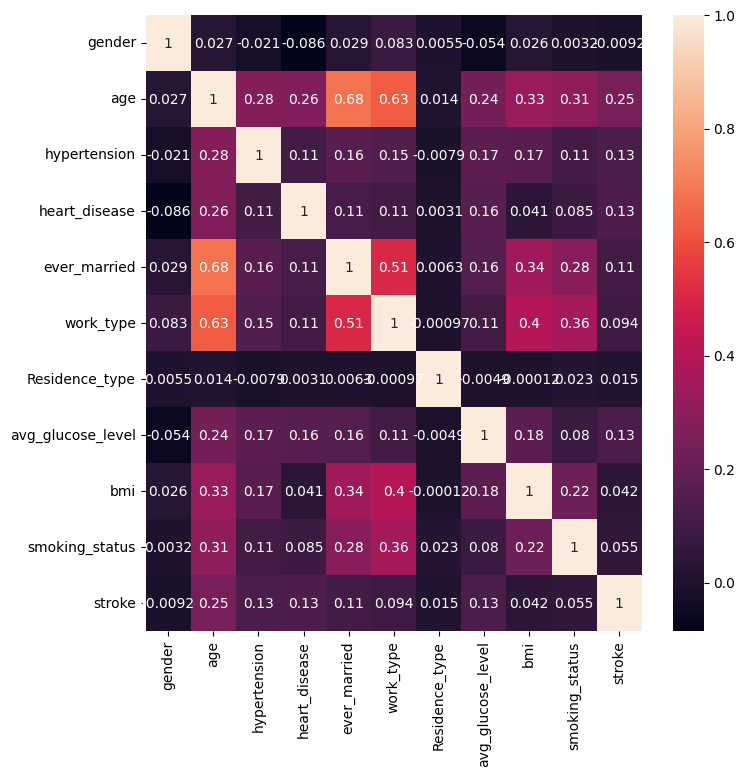

In [50]:
# Check correlation between features
plt.figure(figsize=(8,8))
corr = data.corr()
sns.heatmap(corr, annot=True)

- As can be seen that, **age, hypertension, ever_married and work_type** have the highest correlation rate with **bmi**, therefore, we will pick these 3 features for **Decision Tree Regressor**

In [51]:
train_columns = [1,4,5]

data_copy = data[data['bmi'].notnull()].copy()

data_copy = data_copy.sample(frac=1).reset_index(drop=True)

X = data_copy.iloc[:, train_columns].values
y = data_copy.iloc[:, 8].values
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[28.7 24.5 30.7 ... 44.5 26.6 22.4]


In [52]:
def scaleDataset(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

X_train = scaleDataset(X_train)
X_test = scaleDataset(X_test)


In [53]:

decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)


In [54]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Model Report : ")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score (R²): {r2:.2f}")

Regression Model Report : 
Mean Absolute Error (MAE): 5.26
Mean Squared Error (MSE): 51.48
R2 Score (R²): 0.17


&rarr; This strategy give better result than using Mean strategy

+ We start fill in missing value with output predicted by our model

In [55]:
missing_idx = data[data['bmi'].isnull()].index

for i in missing_idx:
    X_i = data.iloc[i, train_columns].values
    X_i = scaleDataset(X_i[:, np.newaxis]).reshape(1,-1)
    y_pred = decision_tree.predict(X_i)
    data.loc[i, 'bmi'] = y_pred

In [56]:
data['bmi'].isnull().sum()

np.int64(0)

&rarr; Phew!!, No more missing value

<div id = "questions"> <h2> 5. Questions </h2> </div>

<div id = "question-1"> <h3>5.1. Question 1 </h3></div>

**A question:** How do multiple factors such as **`age`**, **`hypertension`**, **`heart_disease`** and **`avg_glucose_level`** relate to stroke, from there we will choose 2 features having the highest influence on stroke and see how these features affect each other

**Answer this question will help us:**
- Identify the most influential factors that contribute to stroke risk. By understanding how **`age`**, **`hypertension`**, **`heart disease`**, and **`average glucose levels`** relate to stroke, we can pinpoint which of these factors have the highest impact.
- Make informed decisions on prioritizing interventions or treatments. For example, if certain factors like age or hypertension are more strongly related to stroke, healthcare providers can target those areas for better prevention.
- Understand the combined effects of multiple factors on stroke risk. By investigating how two features with the highest influence on stroke interact, we can assess whether these factors have a synergistic effect or if one factor alone has a stronger influence.

**How to answer:**
- Exploring Each Factor’s Individual Impact on Stroke: using Logistic Regression to assess the odds of stroke based on these factors.
- Investigating Interactions Between the Two Most Influential Factors:
    - Interaction Terms: If the two most influential factors are, for example, age and hypertension, explore how they jointly affect stroke risk.
    - Visualization: Visualize the relationship between these two factors and stroke to identify patterns or synergistic effects.
- Concluding Insights:
    - Summarize how each factor affects stroke risk.
    - Highlight the two most influential features and explain their combined impact.
    - Suggest possible preventive measures or areas of focus based on the findings.

### Preprocessing

First we will need to import Logistic Regression for Hypothesis Testing

In [57]:
import statsmodels.api as sm

Secondly, create the model with intercept for Logistic Regression and features like **`age`**, **`hypertension`**, **`heart_disease`** and **`avg_glucose_level`**

In [58]:
data_copy = data.copy()
data['intercept'] = 1   
lm = sm.Logit(data['stroke'], data[[ 'intercept', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.155720
         Iterations 9


### Analysis

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5105
Method:                           MLE   Df Model:                            4
Date:                Sun, 24 Nov 2024   Pseudo R-squ.:                  0.2004
Time:                        02:20:18   Log-Likelihood:                -795.73
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 4.774e-85
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -7.4894      0.358    -20.927      0.000      -8.191      -6.788
age                   0.0689      0.005     13.409      0.000       0.059       0.079
hypertension          0.3814      0.163      2.346      0.019       0.063       0.700
heart_disease         0.3300      0.188      1.758      0.079      -0.038       0.698
avg_glucose_level     0.0041      0.001      3.546      0.000       0.002       0.006
=====================================================================================
"""

- **`Age:`** 0.0689, highly significant (p = 0.000 < 0.001). For each one-year increase in age, the odds of having a stroke increase by approximately 𝑒^0.0689 ≈ 1.071(about a 7.1% increase).

- **`Hypertension:`** 0.3814, significant (p = 0.019 < 0.05). Having hypertension increases the odds of stroke by about 𝑒^0.3814 ≈ 1.464 (a 46.4% increase).

- **`Heart Disease:`** 0.3300, not statistically significant at the 5% level (p = 0.079). This suggests that, in this model, having heart disease is not a strong predictor of stroke, though it might have some effect.

- **`Average Glucose Level:`** 0.0041, highly significant (p = 0.000 < 0.001). For each unit increase in average glucose level, the odds of having a stroke increase by 𝑒^0.0041 ≈ 1.004 (a 0.4% increase).

&rarr; **`Age`** and **`Average Glucose Level`** seem to be strong predictors of stroke based on their significance and effect size.    

Third, to have clearer view, we will have a sub question:

**How does the combination of **`Age`** and **`Average Glucose Level`** influence the stroke rate**

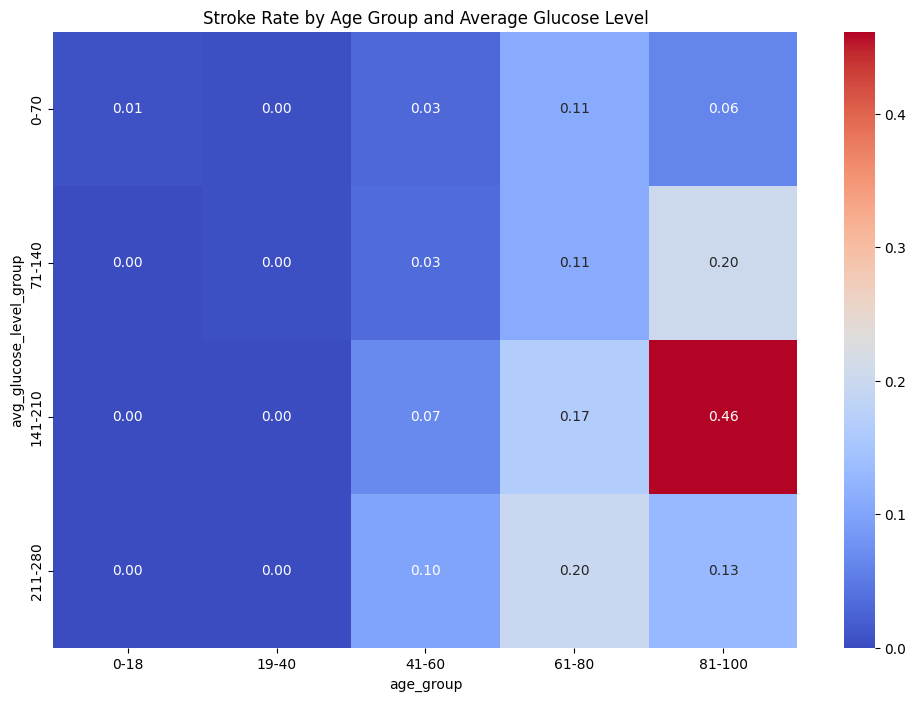

In [60]:
data_tmp = data.copy()
data_tmp['age_group'] = pd.cut(data_tmp['age'], bins=[0, 18, 40, 60, 80, 100], labels=['0-18', '19-40', '41-60', '61-80', '81-100'])

data_tmp['avg_glucose_level_group'] = pd.cut(data_tmp['avg_glucose_level'], bins=[0, 70, 140, 210, 280, 350], labels=['0-70', '71-140', '141-210', '211-280', '281-350'])

pivot_table = data_tmp.pivot_table(values='stroke', index='avg_glucose_level_group', columns='age_group', aggfunc='mean', observed=True)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Stroke Rate by Age Group and Average Glucose Level')
plt.show()

In [61]:
# Print the correlation matrix using print
print(pivot_table)

age_group                    0-18     19-40     41-60     61-80    81-100
avg_glucose_level_group                                                  
0-70                     0.006803  0.004785  0.030568  0.109677  0.062500
71-140                   0.001403  0.004970  0.032957  0.109012  0.203125
141-210                  0.000000  0.000000  0.067901  0.165803  0.461538
211-280                  0.000000  0.000000  0.100917  0.197368  0.130435


- `Age Group Impact:`
    - Stroke rates generally increase with age, as evident by the darker colors in the higher age groups.
    - The 61-80 age group shows the highest stroke rate across all average glucose levels.

- `Average Glucose Level Impact:`
    - Higher average glucose levels are associated with increased stroke risk, particularly in the 61-80 age group.
    - The 71-140 average glucose level group has the highest stroke rate across all age groups.
    
- `Age related risk`: Stroke rates generally increase with age regardless of avg_glucose_level, as evident by the darker colors in the higher age groups.
- `Age - Glucose interaction`: 
    - The 61-80 age group shows the highest stroke rate across all average glucose levels
    - The combination of higher age and higher average glucose levels appears to have a synergistic effect on stroke risk, as seen in the darkest cells in the top right corner of the heatmap

### Conclusion

1. **`Age`** is the Strongest Predictor:

- The sharp increase in stroke rates with age suggests targeted screening and prevention for older adults, particularly those over 60.

2. **`Hypertension Management`** is Crucial:

- Hypertension significantly increases stroke risk. Interventions to manage blood pressure (e.g., lifestyle changes, medications) can substantially reduce risk.

3. **`Monitor High Glucose Levels`**:

- Elevated glucose levels contribute to stroke risk. Managing diabetes or pre-diabetic conditions is essential, especially in older age groups.

4. **`Heart Disease May Play a Role:`**

- While not statistically significant at the 5% level, the relationship between heart disease and stroke risk warrants further investigation with a larger dataset or additional variables.

5. **`Focus on Preventative Care:`**

- Younger individuals (0-40) have low stroke rates overall, suggesting resources can be concentrated on older, high-risk groups for maximum impact.

<div id = "question-2"> <h3>5.2. Question 2 </h3></div>

**A question:**

**Answer this question will help us:**

**How to answer:**

### Preprocessing

### Analysis

### Conclusion

<div id = "question-3"> <h3>5.3. Question 3 </h3></div>

**A question:** What lifestyle choices can help us best reduce our risk of having a stroke?

**Answer this question will help us:**
- Identify which specific values within each feature are most strongly associated with a higher risk of having a stroke compared to the others.
- Prevent strokes by making the most effective lifestyle changes possible, given that not all individual characteristics can be modified.
- Find out the lifestyle that is associated with the lowest stroke risk.

**How to answer:** 
- Turn all numerical features into categorical columns.
    - Case 1: Divide them into bins with equal occurrence rates, so we can ensure that each bin represents the same proportion of the dataset.
    - Case 2: Divide them into groups based on their medical implications to ensure the conclusions are both practically meaningful and relevant to the medical context.
- Use Chi-square test to identify the significance of the features to decide which features will be removed.
- Compare the distribution of values in the general population with the distribution of values in the stroke sample set to identify any significant differences.
- Use the Z-test helps determine whether the difference between the overall rate and the rate in the stroke group is statistically significant, ensuring that conclusions are based on reliable data rather than chance.
- Draw conclusions about which value from each feature is most strongly associated with an increased likelihood of having a stroke.

### Preprocessing

- We observe that there is only 1 representation with gender as 'Other', which has no statistical significance, so we will remove this representation

In [62]:
# Create data_q3 by filtering out rows where Gender is 'Other'
data_q3 = data[data['gender'] != 2].copy()
data_q3['gender'].unique()

array([0, 1])

In [63]:
data_q3.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,intercept
0,0,67.0,0,1,1,3,1,228.69,36.6,2,1,1
1,1,61.0,0,0,1,4,0,202.21,40.3,1,1,1
2,0,80.0,0,1,1,3,0,105.92,32.5,1,1,1
3,1,49.0,0,0,1,3,1,171.23,34.4,3,1,1
4,1,79.0,1,0,1,4,0,174.12,24.0,1,1,1


- Perform chi-square test to check if the distribution of strokes differs by categorical columns

In [64]:
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [65]:
for col in ['gender', 'age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    contingency_table = pd.crosstab(data_q3[col], data_q3['stroke'])
    chi2, p_value = chi2_contingency(contingency_table)[:2]
    print(f"Chi-square test for {col}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  p-value: {p_value:.4f}\n")

Chi-square test for gender:
  Chi-square statistic: 0.3400
  p-value: 0.5598

Chi-square test for age:
  Chi-square statistic: 491.6052
  p-value: 0.0000

Chi-square test for avg_glucose_level:
  Chi-square statistic: 4170.7352
  p-value: 0.0160

Chi-square test for bmi:
  Chi-square statistic: 452.2711
  p-value: 0.1129

Chi-square test for hypertension:
  Chi-square statistic: 81.5731
  p-value: 0.0000

Chi-square test for heart_disease:
  Chi-square statistic: 90.2294
  p-value: 0.0000

Chi-square test for ever_married:
  Chi-square statistic: 58.8678
  p-value: 0.0000

Chi-square test for work_type:
  Chi-square statistic: 49.1591
  p-value: 0.0000

Chi-square test for Residence_type:
  Chi-square statistic: 1.0750
  p-value: 0.2998

Chi-square test for smoking_status:
  Chi-square statistic: 29.2257
  p-value: 0.0000



    → Since p-values of Gender and Residence_type are to big than 0.05, Gender and Residence_type do not have a significant impact on stroke risk in this dataset, so we will proceed to remove both columns.
    → Especially that p-value of bmi is a little bigger than 0.05, we will keep this column to analyze later.
    → Also, we leave out the work_type column because that's almost hard to everybody to change

In [66]:
data_q3.drop(['gender', 'Residence_type', 'work_type'], axis=1, inplace=True)
data_q3.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,intercept
0,67.0,0,1,1,228.69,36.6,2,1,1
1,61.0,0,0,1,202.21,40.3,1,1,1
2,80.0,0,1,1,105.92,32.5,1,1,1
3,49.0,0,0,1,171.23,34.4,3,1,1
4,79.0,1,0,1,174.12,24.0,1,1,1


- Data for case 1:

In [67]:
# Create copy of data for case 2
data_q3_bin1 = data_q3.copy()

# Convert age to categories
def age_category(age):
    if age < 18:
        return 'Child'
    elif 18 <= age <= 35:
        return 'Young Adult'
    elif 36 <= age <= 55:
        return 'Middle Age'
    else:
        return 'Senior'

data_q3_bin1['age'] = data_q3_bin1['age'].apply(age_category)

# Convert glucose level to categories
def glucose_category(glucose):
    if glucose < 70:
        return 'Low'
    elif 70 <= glucose <= 140:
        return 'Normal'
    else:
        return 'High'

data_q3_bin1['avg_glucose_level'] = data_q3_bin1['avg_glucose_level'].apply(glucose_category)

# Convert BMI to categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

data_q3_bin1['bmi'] = data_q3_bin1['bmi'].apply(bmi_category)

- Data for case 2:

In [68]:
# Create a copy of the original data for case 2
data_q3_bin2 = data_q3.copy()

# Convert age into 4 equal-sized bins and get bin ranges
age_bins = pd.qcut(data_q3_bin2['age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
age_ranges = pd.qcut(data_q3_bin2['age'], q=4, retbins=True)[1]
data_q3_bin2['age'] = age_bins

# Convert glucose level into 4 equal-sized bins and get bin ranges
glucose_bins = pd.qcut(data_q3_bin2['avg_glucose_level'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
glucose_ranges = pd.qcut(data_q3_bin2['avg_glucose_level'], q=4, retbins=True)[1]
data_q3_bin2['avg_glucose_level'] = glucose_bins

# Convert BMI into 4 equal-sized bins and get bin ranges
bmi_bins = pd.qcut(data_q3_bin2['bmi'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bmi_ranges = pd.qcut(data_q3_bin2['bmi'], q=4, retbins=True)[1]
data_q3_bin2['bmi'] = bmi_bins

- Comment: because of using qcut() function in pandas, values in columns will be distributed as evenly as possible into bins, however there may still be some imbalance since qcut() ensures consistency by keeping identical values in the same bin.

### Analysis

- Case 1:

In [69]:
for col in ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']:
    contingency_table = pd.crosstab(data_q3_bin1[col], data_q3_bin1['stroke'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  p-value: {p_value:.4f}\n")

Chi-square test for age:
  Chi-square statistic: 317.6683
  p-value: 0.0000

Chi-square test for avg_glucose_level:
  Chi-square statistic: 88.1378
  p-value: 0.0000

Chi-square test for bmi:
  Chi-square statistic: 39.3556
  p-value: 0.0000

Chi-square test for hypertension:
  Chi-square statistic: 81.5731
  p-value: 0.0000

Chi-square test for heart_disease:
  Chi-square statistic: 90.2294
  p-value: 0.0000

Chi-square test for ever_married:
  Chi-square statistic: 58.8678
  p-value: 0.0000

Chi-square test for smoking_status:
  Chi-square statistic: 29.2257
  p-value: 0.0000



    → Based on the chi-square test results: all remaining columns have a significant relationship with stroke (p < 0.05)

In [70]:
# Get unique age groups
age_groups = data_q3_bin1['age'].unique()

# For each age group
for age_group in age_groups:
    print(f"\nPercentage distributions for age group: {age_group}")
    
    # Get data for this age group
    age_group_data = data_q3_bin1[data_q3_bin1['age'] == age_group]
    
    # Calculate percentages for other columns
    for col in ['avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']:
        # Calculate value counts and percentages
        value_counts = age_group_data[col].value_counts()
        total_percentages = (value_counts / len(age_group_data[col])) * 100
        
        # Calculate percentages for stroke=0
        stroke_0_data = age_group_data[age_group_data['stroke'] == 0]
        stroke_0_counts = stroke_0_data[col].value_counts()
        stroke_0_percentages = (stroke_0_counts / len(stroke_0_data)) * 100
        
        print(f"\n- The difference between Percentage in non-stroke cases versus Overall percentage distribution for {col} in the subdataset:")
        for value in value_counts.index:
            total_pct = total_percentages[value] if value in total_percentages else 0
            stroke_0_pct = stroke_0_percentages[value] if value in stroke_0_percentages else 0
            diff_value = stroke_0_pct - total_pct
            
            # Get counts for z-test
            count1 = stroke_0_counts[value] if value in stroke_0_counts else 0
            count2 = value_counts[value] if value in value_counts else 0
            n1 = len(stroke_0_data)
            n2 = len(age_group_data)
            
            # Perform proportions z-test
            z_stat, p_value = proportions_ztest([count1, count2], [n1, n2])
            
            print(f"{value}: {diff_value:.2f}% (z={z_stat:.2f}, p={p_value:.4f})")


Percentage distributions for age group: Senior

- The difference between Percentage in non-stroke cases versus Overall percentage distribution for avg_glucose_level in the subdataset:
Normal: 1.22% (z=0.70, p=0.4830)
High: -1.69% (z=-1.07, p=0.2866)
Low: 0.46% (z=0.38, p=0.7037)

- The difference between Percentage in non-stroke cases versus Overall percentage distribution for bmi in the subdataset:
Obese: -0.69% (z=-0.39, p=0.6976)
Overweight: 0.68% (z=0.40, p=0.6862)
Normal: -0.07% (z=-0.06, p=0.9556)
Underweight: 0.08% (z=0.22, p=0.8234)

- The difference between Percentage in non-stroke cases versus Overall percentage distribution for hypertension in the subdataset:
0: 1.01% (z=0.72, p=0.4728)
1: -1.01% (z=-0.72, p=0.4728)

- The difference between Percentage in non-stroke cases versus Overall percentage distribution for heart_disease in the subdataset:
0: 1.16% (z=0.97, p=0.3328)
1: -1.16% (z=-0.97, p=0.3328)

- The difference between Percentage in non-stroke cases versus Overall

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


    → After finding the difference between the proportions of values for stroke = 0 and for the total population in all subdatasets, we can see that the percentage differences are very small.

    → Additionally, by using z-test, we found that these differences in proportions have no practical significance since p > 0.05.

- Case 2:

In [71]:
for col in ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']:
    contingency_table = pd.crosstab(data_q3_bin2[col], data_q3_bin2['stroke'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  p-value: {p_value:.4f}\n")

Chi-square test for age:
  Chi-square statistic: 325.9833
  p-value: 0.0000

Chi-square test for avg_glucose_level:
  Chi-square statistic: 49.7387
  p-value: 0.0000

Chi-square test for bmi:
  Chi-square statistic: 40.7729
  p-value: 0.0000

Chi-square test for hypertension:
  Chi-square statistic: 81.5731
  p-value: 0.0000

Chi-square test for heart_disease:
  Chi-square statistic: 90.2294
  p-value: 0.0000

Chi-square test for ever_married:
  Chi-square statistic: 58.8678
  p-value: 0.0000

Chi-square test for smoking_status:
  Chi-square statistic: 29.2257
  p-value: 0.0000



    → Based on the chi-square test results: all remaining columns have a significant relationship with stroke (p < 0.05)

In [72]:
# Get unique age groups
age_groups = data_q3_bin2['age'].unique()

# For each age group
for age_group in age_groups:
    print(f"\nPercentage distributions for age group: {age_group}")
    
    # Get data for this age group
    age_group_data = data_q3_bin2[data_q3_bin2['age'] == age_group]
    
    # Calculate percentages for other columns
    for col in ['avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']:
        # Calculate value counts and percentages
        value_counts = age_group_data[col].value_counts()
        total_percentages = (value_counts / len(age_group_data[col])) * 100
        
        # Calculate percentages for stroke=0
        stroke_0_data = age_group_data[age_group_data['stroke'] == 0]
        stroke_0_counts = stroke_0_data[col].value_counts()
        stroke_0_percentages = (stroke_0_counts / len(stroke_0_data)) * 100
        
        print(f"\n- The difference between Percentage in non-stroke cases versus Overall percentage distribution for {col} in the subdataset:")
        for value in value_counts.index:
            total_pct = total_percentages[value] if value in total_percentages else 0
            stroke_0_pct = stroke_0_percentages[value] if value in stroke_0_percentages else 0
            diff_value = stroke_0_pct - total_pct
            
            # Get counts for z-test
            count1 = stroke_0_counts[value] if value in stroke_0_counts else 0
            count2 = value_counts[value] if value in value_counts else 0
            n1 = len(stroke_0_data)
            n2 = len(age_group_data)
            
            # Perform proportions z-test
            z_stat, p_value = proportions_ztest([count1, count2], [n1, n2])
            
            print(f"{value}: {diff_value:.2f}% (z={z_stat:.2f}, p={p_value:.4f})")


Percentage distributions for age group: Q4

- The difference between Percentage in non-stroke cases versus Overall percentage distribution for avg_glucose_level in the subdataset:
Q4: -2.00% (z=-1.00, p=0.3150)
Q1: -0.05% (z=-0.03, p=0.9764)
Q3: 0.87% (z=0.50, p=0.6181)
Q2: 1.18% (z=0.68, p=0.4960)

- The difference between Percentage in non-stroke cases versus Overall percentage distribution for bmi in the subdataset:
Q3: 1.20% (z=0.61, p=0.5429)
Q2: -0.23% (z=-0.12, p=0.9039)
Q4: -0.93% (z=-0.51, p=0.6112)
Q1: -0.04% (z=-0.03, p=0.9784)

- The difference between Percentage in non-stroke cases versus Overall percentage distribution for hypertension in the subdataset:
0: 1.15% (z=0.66, p=0.5066)
1: -1.15% (z=-0.66, p=0.5066)

- The difference between Percentage in non-stroke cases versus Overall percentage distribution for heart_disease in the subdataset:
0: 0.93% (z=0.61, p=0.5439)
1: -0.93% (z=-0.61, p=0.5439)

- The difference between Percentage in non-stroke cases versus Overall p

    → After finding the difference between the proportions of values for stroke = 0 and for the total population in all subdatasets, we can see that the percentage differences are very small.

    → Additionally, by using z-test, we found that these differences in proportions have no practical significance since p > 0.05.

### Conclusion

- With both ways of dividing bins, the results show us that the difference in output (stroke) between the values ​​of the "lifestyle" columns is very small.
- In addition, by using the Z-test to test whether that small difference is meaningful or not, the conclusion will still be that "lifestyle" does not really affect the stroke rate in this dataset.

    → There is no lifestyle that has the lowest stroke rate.

<div id = "conclusion"> <h2> 6. Conclusion </h2> </div>

<div id = "difficulties"> <h3>6.1. Difficulties during the project </h3></div>

<div id = "useful"> <h3>6.2. Useful things learned</h3></div>

<div id = "plans"> <h3>6.3. Plans to improve if have more time</h3></div>

<div id = "references"> <h2>7. References</h2></div>